# Session 1 & 2
Review Python
- import libraries
- print
- torch version
- cuda availability

In [ ]:
import torch, numpy, matplotlib
a = 10
print(a)
print(f'Torch {a} version:{torch.__version__}')
print("Check if cuda is available:",torch.cuda.is_available())

10
Torch 10 version:2.8.0+cu126
Check if cuda is available: True


Review Python
- for
- square
- function

In [ ]:
b = [i**2 for i in range(5)]
print(b)


[0, 1, 4, 9, 16]


In [ ]:
def relu(x):
  return max(0,x)

y = [relu(i) for i in [0,2,3]]
print(y)

[0, 2, 3]


Review Python
- numpy
- arrays
- Elementwise multiply
- matrix multiply
- broadcast

In [ ]:
import numpy as np
g = np.array([[1,2],[2,3]])
print(g)

[[1 2]
 [2 3]]


In [ ]:
f = np.array([[2,6],[7,8]])
print("Elementwise multipliy:", f * g)

Elementwise multipliy: [[ 2 12]
 [14 24]]


In [ ]:
h = f @ g
print("Matrix multiply:", h)

Matrix multiply: [[14 22]
 [23 38]]


In [ ]:
k = np.array([10,30])
print(k)
print(g+k)

[10 30]
[[11 32]
 [12 33]]


# Exercise 1: Compute y= Wx + b with MSE loss.
- Define x, W and b
- write the formula
- Define target value
- Calculate loss and print
- x = [1 2], W = [2   , b = 1
                  3]

- Github


In [ ]:
import numpy as np
x = np.array([[1,2]])
print(x)

[[1 2]]


In [ ]:
W = np.array([[2],[3]])
print(W)
b = np.array([1])
print(b)

[[2]
 [3]]
[1]


In [ ]:
y = x @ W + b
print(y)
target = 10
print(target)

[[9]]
10


In [ ]:
loss = np.mean((y-target)**2)
print(loss)

1.0


# Pytorch
- tensor
- require grad
- .backward
- .item()
- .grad

In [ ]:
import torch
x = torch.tensor([[1.0,2.0]],requires_grad= True)
print(x)
W = torch.tensor([[2.0],[3.0]], requires_grad= True)
b = torch. tensor ([1.0], requires_grad= True)
print("W=", W)
print("b=", b)
y = x @ W + b
y.backward()
print("dy/dW=", W.grad)
print("dy/db=", b.grad)

tensor([[1., 2.]], requires_grad=True)
W= tensor([[2.],
        [3.]], requires_grad=True)
b= tensor([1.], requires_grad=True)
dy/dW= tensor([[1.],
        [2.]])
dy/db= tensor([1.])


# Exercise 2: Linear Regression (Manual Gradient Descent)
- manual_seed()
- linspace(,,)
- unsqueeze()
- y = 2x + 1 + noise
- randn()
- size()
- plt.scatter()
- Initialize paramters
- Training Loop
- backward()
- Update parameters: .no_grad()
- .grad.zero_()
- .detach()
- plot, legend, show

In [ ]:
torch.manual_seed(0)
x = torch.linspace(-3,3,100).unsqueeze(1)
# print(x)
y = 2*x + 1 + torch.randn(x.size())

In [ ]:
W = torch.randn(1,1, requires_grad=True)
b= torch.zeros(1,requires_grad=True)
losses = []
lr = 0.01
for epoch in range(100):
  y_predicted = x @ W + b
  loss = torch.mean((y_predicted - y)**2)
  losses.append(loss.item())
  loss.backward()
  with torch.no_grad():
    W -= lr*W.grad
    b -= lr*b.grad
  W.grad.zero_()
  b.grad.zero_()

  print("Learned W:", W.item())
  print("Learned b:", b.item())

NameError: name 'torch' is not defined

# Exercise 3: Using nn.Linear and Optimizers
- Replace manual update
- nn.Linear()
- optimizer = torch.optim.SGD([W, b], lr=0.01)
- nn.MSELoss()
- optimizer.zero_grad()
- loss.backward()
- optimizer.step()
- optimizer.zero_grad()



In [ ]:
from torch import nn
model = nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(), lr =0.01)
loss_function = nn.MSELoss()
for epoch in range(100):
  y_predicted2 = model(x)
  loss = loss_function (y_predicted2, y)
  opt.zero_grad()
  loss.backward()
  opt.step()
print("Learned W and b", [p.data for p in model.parameters()])

Learned W and b [tensor([[1.9963]]), tensor([0.9839])]


# Visualization
- plt.plot()
- plt.title()
- plt.xlabel()
- plt.show()


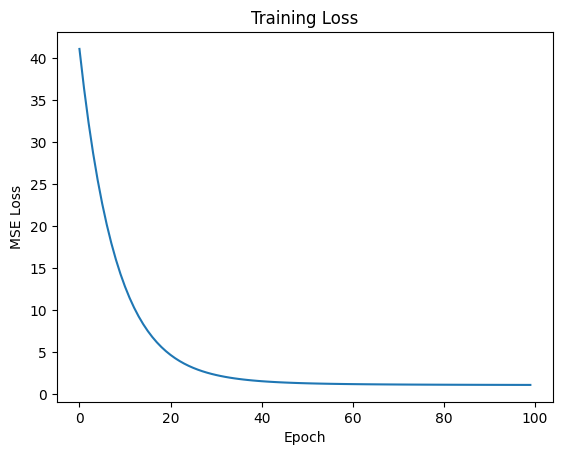

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# GPU & Dataset Intro

# Exercise 4: Implement Linear Regression from Scratch (PyTorch or NumPy)
- y = 3x + 2
- Compare learning rates [0.001, 0.01, 0.1]
- Use Adam optimizer
- Fit nonlinear function y = 2x^2 + 1

LR = 0.001 → w = 1.3627, b = 1.3349, Final Loss = 22.996395
LR = 0.01 → w = 2.9944, b = 2.0213, Final Loss = 0.093633
LR = 0.1 → w = 2.9944, b = 2.0213, Final Loss = 0.093633


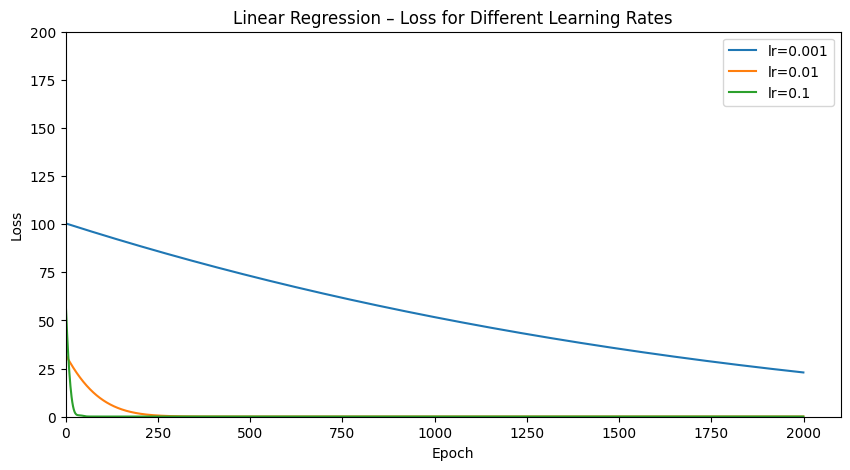


Nonlinear Fit Result:
y ≈ 1.999 x^2 + 0.000 x + 1.008


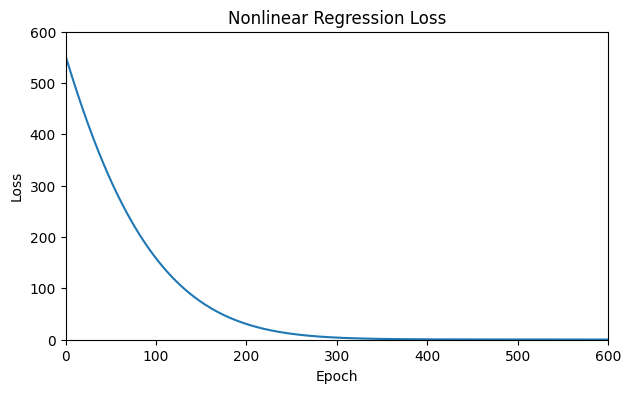

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Adam optimizer (from scratch)
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps

        # moments
        self.m = {}
        self.v = {}
        self.t = 0

    def update(self, params, grads):
        if not self.m:
            for k in params:
                self.m[k] = np.zeros_like(params[k])
                self.v[k] = np.zeros_like(params[k])

        self.t += 1

        for k in params:
            # Update moments
            self.m[k] = self.beta1 * self.m[k] + (1 - self.beta1) * grads[k]
            self.v[k] = self.beta2 * self.v[k] + (1 - self.beta2) * (grads[k] ** 2)

            # Bias correct
            m_hat = self.m[k] / (1 - self.beta1**self.t)
            v_hat = self.v[k] / (1 - self.beta2**self.t)

            # Update parameter
            params[k] -= self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

        return params


# Dataset for linear regression
np.random.seed(0)
x = np.linspace(-5, 5, 200)
y = 3 * x + 2 + np.random.randn(*x.shape) * 0.3


# Train linear regression for any LR
def train_linear(lr, epochs=2000):
    params = {"w": np.random.randn(), "b": np.random.randn()}
    opt = Adam(lr=lr)
    losses = []

    for epoch in range(epochs):
        y_pred = params["w"] * x + params["b"]
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)

        grads = {
            "w": np.mean(2 * (y_pred - y) * x),
            "b": np.mean(2 * (y_pred - y)),
        }

        params = opt.update(params, grads)

    print(f"LR = {lr} → w = {params['w']:.4f}, b = {params['b']:.4f}, Final Loss = {losses[-1]:.6f}")
    return losses


# Compare learning rates
lrs = [0.001, 0.01, 0.1]
all_losses = []

for lr in lrs:
    losses = train_linear(lr)
    all_losses.append(losses)

plt.figure(figsize=(10, 5))
for lr, losses in zip(lrs, all_losses):
    plt.plot(losses, label=f"lr={lr}")
plt.legend()
plt.title("Linear Regression – Loss for Different Learning Rates")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 200)
plt.xlim(0, 2100)
plt.show()


# Nonlinear regression: y = 2x^2 + 1
y2 = 2 * x**2 + 1

# polynomial model: y = w1*x^2 + w2*x + b
params = {
    "w1": np.random.randn(),
    "w2": np.random.randn(),
    "b": np.random.randn(),
}

opt = Adam(lr=0.01)
losses_nonlinear = []

for epoch in range(3000):
    y_pred = params["w1"] * x**2 + params["w2"] * x + params["b"]
    loss = np.mean((y_pred - y2)**2)
    losses_nonlinear.append(loss)

    grads = {
        "w1": np.mean(2 * (y_pred - y2) * x**2),
        "w2": np.mean(2 * (y_pred - y2) * x),
        "b": np.mean(2 * (y_pred - y2)),
    }

    params = opt.update(params, grads)

print(f"\nNonlinear Fit Result:")
print(f"y ≈ {params['w1']:.3f} x^2 + {params['w2']:.3f} x + {params['b']:.3f}")

plt.figure(figsize=(7, 4))
plt.plot(losses_nonlinear)
plt.title("Nonlinear Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 600)
plt.xlim(0, 600)
plt.show()
